In [1]:
import sys
sys.path.insert(0,'/home/csunix/schtmt/NewFolder/caffe_Sep_anaconda/python')
import numpy as np
import matplotlib.pyplot as plt
import caffe
import h5py
import cv2
import fnmatch
import os
from PIL import Image


caffe.set_device(0)
caffe.set_mode_gpu()

# net = caffe.Net('test2_5pred10.prototxt',
#                 '/usr/not-backed-up/MODELS_DATA/models/ped1_iter_360000.caffemodel', 
#                 caffe.TEST) 

# net = caffe.Net('test2_10pred10.prototxt',
#                 '/usr/not-backed-up/MODELS_DATA/models/ped1_iter_360000.caffemodel', 
#                 caffe.TEST) # worse estimation

net = caffe.Net('test2_5pred15.prototxt',
                '/usr/not-backed-up/MODELS_DATA/models/ped1_iter_360000.caffemodel', 
                caffe.TEST)

In [2]:
# def H_visualize_weights(net, layer_name, padding=4, filename=''):
#     # follow the method of "display_network.m"
#     # The parameters are a list of [weights, biases]
#     data = np.copy(net.params[layer_name][0].data)
#     # N is the total number of convolutions
#     N = data.shape[0] * data.shape[1]
#     print N
#     print data.shape
#     # a = data[1,0,:,:]
#     # print abs(a).min()
#     # Ensure the resulting image is square
#     filters_per_row = int(np.ceil(np.sqrt(N)))
#     # Assume the filters are square
#     filter_size = data.shape[2]
#     # Size of the result image including padding
#     result_size = filters_per_row * (filter_size + padding) - padding
#     # Initialize result image to all zeros
#     result = np.ones((result_size, result_size))

#     # Tile the filters into the result image
#     filter_x = 0
#     filter_y = 0
#     for n in range(data.shape[0]):
#         for c in range(data.shape[1]):
#             if filter_x == filters_per_row:
#                 filter_y += 1
#                 filter_x = 0
#             # for i in range(filter_size):
#             #     for j in range(filter_size):
#             #         result[filter_y * (filter_size + padding) + i, filter_x * (filter_size + padding) + j] = data[
#             #             n, c, i, j]
#             result_temp = data[n,c,:,:]
#             clim = abs(result_temp).max()
#             result[filter_y * (filter_size + padding):filter_y * (filter_size + padding) + filter_size,
#             filter_x * (filter_size + padding):filter_x * (filter_size + padding) + filter_size] = data[n,c,:,:]/clim
#             filter_x += 1
#     print result.shape
#     # # Normalize image to 0-1
#     # min = result.min()
#     # max = result.max()
#     # result = (result - min) / (max - min)

#     # Plot figure
#     plt.figure(figsize=(10, 10))
#     plt.axis('off')
#     plt.imshow(result, cmap='gray', interpolation='nearest')

#     # Save plot if filename is set
#     if filename != '':
#         plt.savefig(filename, bbox_inches='tight', pad_inches=0)

#     plt.show()
# H_visualize_weights(net, 'deconv3', filename='deconv_ped1_360000.png')


In [3]:
# print([(k, v.data.shape) for k, v in net.blobs.items()]) # Python data type: list
frame_path='/usr/not-backed-up/1_DATABASE/UCSD_Anomaly_Dataset.tar/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/'
for seq in range(23,24):
# -----------------------------------------------------------
    print(seq)    
    # load images
    if seq < 9:                
        dirpath = (frame_path + 'Test00%d' % (seq+1))
    else:
        dirpath = (frame_path + 'Test0%d' % (seq+1))
    nfr = len(fnmatch.filter(os.listdir(dirpath), '*.tif'))
#         frame_seq = np.zeros((227,227,nfr),dtype=np.float64)
    for fr in range(nfr):            
        if fr < 9:
            fr_id = '00%d' % (fr+1)                                       
        elif fr < 99:
            fr_id = '0%d' % (fr+1)                
        else:
            fr_id = '%d' % (fr+1)                
        im1 = Image.open(dirpath + '/' + fr_id + '.tif')
        im1 = np.array(im1.resize((227,227),Image.BILINEAR))#size [width,height]            
        im1 = np.reshape(im1,[1,227,227])
        im1 = im1.astype(float) / 255.
        if fr == 0:
            frame_seq = im1
        else:
            frame_seq = np.append(frame_seq,im1,0)
    frame_error = np.zeros([1,nfr-9])
    print(frame_error.shape)
    #for fr in range(25,26):#(150,151):#
    for fr in range(145,146):
        cur_vol = frame_seq[fr:fr+20,:,:]
        cur_vol = cur_vol.reshape([1,20,1,227,227])
#         net.blobs['input'].data[...] = cur_vol
        net.blobs['input'].data[...] = cur_vol[:,0:5,:,:,:] #10pred10
        out = net.forward()

23
(1, 191)


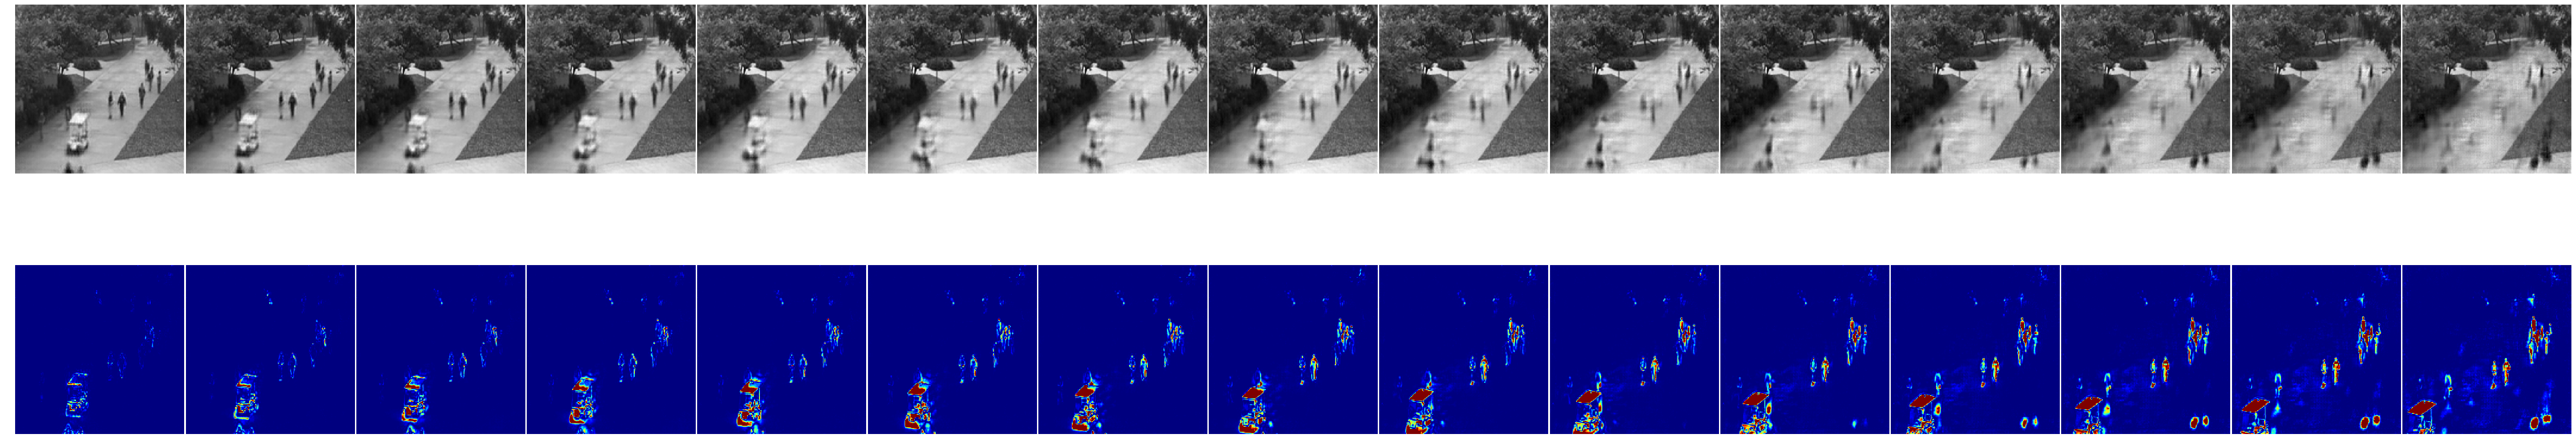

In [9]:
# reconstruction
pred = net.blobs['deconv3'].data
# prediction = cur_vol[:,5:15,:,:,:]
prediction = cur_vol[:,5:20,:,:,:]
prediction = np.reshape(prediction,[15,1,227,227])
prediction = np.reshape(prediction,[15,227,227])
pred = np.reshape(pred,[15,227,227])
error = np.power(prediction - pred,2)
# err = np.reshape(error,[5,227*227])
# err = np.sqrt(np.sum(err,1))
# print(np.sum(err))

# import matplotlib.gridspec as gridspec
# plt.figure(figsize=(227,227))
# plt.figure(figsize=(3,5))
# gs1 = gridspec.GridSpec(3,5)
# gs1.update()
plt.figure(figsize=(100,100))
# for i in range(5):
#     plt.subplot(3,5,i+1)
#     #     input_ = np.reshape(prediction[i,:,:,:,:],[227,227])
#     input_ = np.reshape(prediction[i,:,:],[227,227])
#     plt.imshow(input_,cmap='gray')
#     plt.axis('off')
for i in range(15):
#     print(i)
    plt.subplot(2,15,i+1)
    input_ = np.reshape(pred[i,:,:],[227,227]) 
    plt.imshow(input_,cmap='gray')
    plt.axis('off') 
for i in range(15):
    plt.subplot(2,15,i+16)
    input_ = np.reshape(error[i,:,:],[227,227])
#     plt.imshow(input_)
    imgplot = plt.imshow(input_,clim=(0.0,0.2))
    imgplot.set_cmap('jet')
    plt.axis('off') 
plt.subplots_adjust(bottom=0.722,wspace=0.01,hspace=0.00000000001)#for 2 rows
# plt.subplots_adjust(bottom=0.405,wspace=0.01,hspace=0.00000000001)#for 3 rows
# plt.tight_layout()
# plt.subplots_adjust(wspace=0.01,hspace=0.9)
plt.show()
# plt.savefig('ped1_wheelchair_prediction6_seq23fr106-110_error29p33.jpg')
# plt.savefig('ped1_5pred10_seq24_frame156-160.jpg')

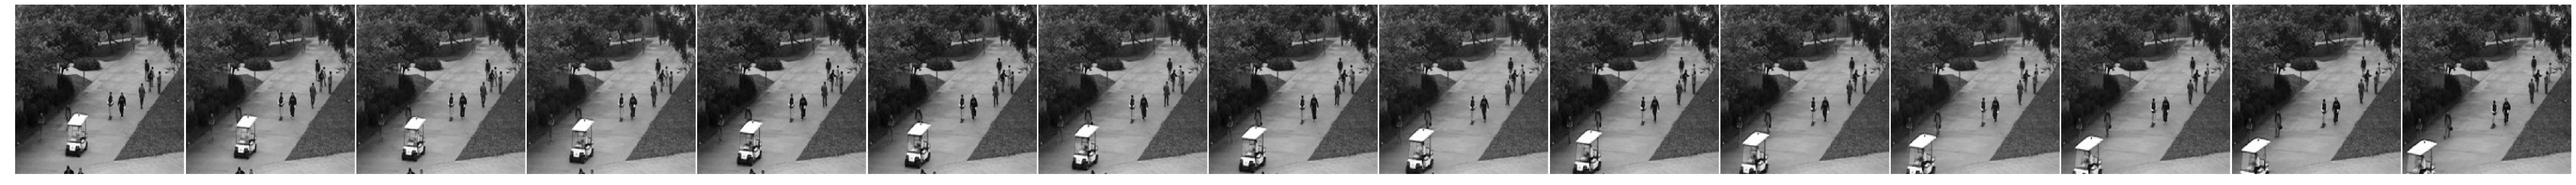

In [5]:
plt.figure(figsize=(100,100))
for i in range(15):
    plt.subplot(1,15,i+1)
    #     input_ = np.reshape(prediction[i,:,:,:,:],[227,227])
    input_ = np.reshape(prediction[i,:,:],[227,227])
    plt.imshow(input_,cmap='gray')
    plt.axis('off')
plt.subplots_adjust(bottom=0.565,wspace=0.01,hspace=0.00000000001)#for 2 rows
plt.show()    
# plt.savefig('ped1_wheelchair_targetSeq_seq23fr106-110.jpg')

In [6]:
# gt_location = '/usr/not-backed-up/1_DATABASE/UCSD_Anomaly_Dataset.tar/UCSD_Anomaly_Dataset.v1p2/VideoSequences/UCSDped1/Test_gt_location'
# #reconstruction
# recons = net.blobs['deconv3'].data
# prediction = cur_vol[:,5:10,:,:,:]
# prediction = np.reshape(prediction,[5,1,227,227])
# prediction = np.reshape(prediction,[5,227,227])
# recons = np.reshape(recons,[5,227,227])
# error = np.power(prediction - recons,2)
# err = np.reshape(error,[5,227*227])
# err = np.sqrt(np.sum(err,1))
# print(np.sum(err))

# # for visualization
# with h5py.File(os.path.join(gt_location,'Test%d_gt_location.mat'%(seq+1))) as f:    
#     data = [f[element[0]][:] for element in f['gt_location']]
# # data_ = np.array(data)

# import matplotlib.patches as patches
# #####################

# fig2 = plt.figure(figsize=(100,100))
# # plt.figure(figsize=(100,100))
# for i in range(5):
#     plt.subplot(3,5,i+1)
#     #     input_ = np.reshape(prediction[i,:,:,:,:],[227,227])
#     input_ = np.reshape(prediction[i,:,:],[227,227])
#     plt.imshow(input_,cmap='gray')
#     plt.axis('off')
# for i in range(5):
# #     print(i)
#     plt.subplot(3,5,i+6)
#     input_ = np.reshape(recons[i,:,:],[227,227]) 
#     plt.imshow(input_,cmap='gray')
#     plt.axis('off') 
# # for i in range(5):
# #     plt.subplot(3,5,i+11)
# #     input_ = np.reshape(error[i,:,:],[227,227])
# # #     plt.imshow(input_)
# #     imgplot = plt.imshow(input_,clim=(0.0,0.2))    
# #     imgplot.set_cmap('jet')
# #     plt.axis('off') 
# # plt.subplots_adjust(bottom=0.405,wspace=0.01,hspace=0.00000000001)
# # # plt.tight_layout()
# # # plt.subplots_adjust(wspace=0.01,hspace=0.9)
# # plt.show()
# # # plt.savefig('bike_ped2_recons.jpg')


# ax1 = fig2.add_subplot(3,5,11)
# input_ = np.reshape(error[0,:,:],[227,227])
# ax1.imshow(input_,clim=(0.0,0.2),cmap='jet') 
# # gt_fr = np.transpose(data_[fr+5],[1,0])
# data_ = np.array(data[fr+5])
# if data_[0,:] !=0:
#     gt_fr = np.transpose(data_,[1,0])
#     for id in range(gt_fr.shape[0]):
#         x = gt_fr[id,0]
#         y = gt_fr[id,1]
#         w = gt_fr[id,2]
#         h = gt_fr[id,3]
#         rect = patches.Rectangle((x,y),w,h,linewidth=5,edgecolor='y',facecolor='none')
#         ax1.add_patch(rect)

# ##############
# ax2 = fig2.add_subplot(3,5,12)
# input_ = np.reshape(error[1,:,:],[227,227])
# ax2.imshow(input_,clim=(0.0,0.2),cmap='jet') 
# # gt_fr = np.transpose(data_[fr+6],[1,0])
# data_ = np.array(data[fr+6])
# if data_[0,:] != 0:
#     gt_fr = np.transpose(data_,[1,0])
#     for id in range(gt_fr.shape[0]):
#         x = gt_fr[id,0]
#         y = gt_fr[id,1]
#         w = gt_fr[id,2]
#         h = gt_fr[id,3]
#         rect = patches.Rectangle((x,y),w,h,linewidth=5,edgecolor='y',facecolor='none')
#         ax2.add_patch(rect)
# # #############
# # ##############
# ax3 = fig2.add_subplot(3,5,13)
# input_ = np.reshape(error[2,:,:],[227,227])
# ax3.imshow(input_,clim=(0.0,0.2),cmap='jet') 
# # gt_fr = np.transpose(data_[fr+7],[1,0])
# data_ = np.array(data[fr+7])
# if data_[0,:] != 0:
#     gt_fr = np.transpose(data_,[1,0])
#     for id in range(gt_fr.shape[0]):
#         x = gt_fr[id,0]
#         y = gt_fr[id,1]
#         w = gt_fr[id,2]
#         h = gt_fr[id,3]
#         rect = patches.Rectangle((x,y),w,h,linewidth=5,edgecolor='y',facecolor='none')
#         ax3.add_patch(rect)
# # #############
# # ##############
# ax4 = fig2.add_subplot(3,5,14)
# input_ = np.reshape(error[3,:,:],[227,227])
# ax4.imshow(input_,clim=(0.0,0.2),cmap='jet') 
# # gt_fr = np.transpose(data_[fr+8],[1,0])
# data_ = np.array(data[fr+8])
# if data_[0,:] != 0:
#     gt_fr = np.transpose(data_,[1,0])
#     for id in range(gt_fr.shape[0]):
#         x = gt_fr[id,0]
#         y = gt_fr[id,1]
#         w = gt_fr[id,2]
#         h = gt_fr[id,3]
#         rect = patches.Rectangle((x,y),w,h,linewidth=5,edgecolor='y',facecolor='none')
#         ax4.add_patch(rect)
# # #############
# # ##############
# ax5 = fig2.add_subplot(3,5,15)
# input_ = np.reshape(error[4,:,:],[227,227])
# ax5.imshow(input_,clim=(0.0,0.2),cmap='jet') 
# # gt_fr = np.transpose(data_[fr+9],[1,0])
# data_ = np.array(data[fr+9])
# if data_[0,:] != 0:
#     gt_fr = np.transpose(data_,[1,0])
#     for id in range(gt_fr.shape[0]):
#         x = gt_fr[id,0]
#         y = gt_fr[id,1]
#         w = gt_fr[id,2]
#         h = gt_fr[id,3]
#         rect = patches.Rectangle((x,y),w,h,linewidth=5,edgecolor='y',facecolor='none')
#         ax5.add_patch(rect)
# # #############
# # plt.subplots_adjust(bottom=0.405,wspace=0.01,hspace=0.00000000001)
# # plt.show()

# # # plt.savefig('biker_seq9ped2_frame100_predict.jpg')

In [7]:
# data_ = np.array(data[fr+5])
# print(data_)

In [8]:


# fig = plt.figure(figsize=(25,25))
# plt.subplot(1,3,1)    
# input_ = np.reshape(prediction[2,:,:],[227,227])
# plt.imshow(input_,cmap='gray')
# plt.axis('off')


# plt.subplot(1,3,2)
# input_ = np.reshape(recons[2,:,:],[227,227]) 
# plt.imshow(input_,cmap='gray')
# plt.axis('off') 


# a = np.sum(error,0)
# input_ = np.reshape(a,[227,227])/5
# ax = fig.add_subplot(1,3,3)

# ax.imshow(input_,clim=(0.0,0.1),cmap='jet') 
# data_ = np.array(data[fr+9])
# gt_fr = np.transpose(data_,[1,0])
# for id in range(gt_fr.shape[0]):
#     x = gt_fr[id,0]
#     y = gt_fr[id,1]
#     w = gt_fr[id,2]
#     h = gt_fr[id,3]
#     rect = patches.Rectangle((x,y),w,h,linewidth=5,edgecolor='y',facecolor='none')
#     ax.add_patch(rect)
#     ax.axis('off')
#     plt.subplots_adjust(bottom=0.405,wspace=0.01,hspace=0.00000000001)
# plt.show()    
# # plt.savefig('biker_seq3ped2_frame80_predict.jpg')